# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# nsteps = 0
# while True:
#     nsteps += 1
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
# #     print(actions[0])
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score over {} steps (averaged over agents) this episode: {}'.format(nsteps, np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from ddpg_agent import Agent

agent = Agent(state_size, action_size, 0, num_agents)

In [7]:
import torch
from collections import deque

def train(n_episodes=500, max_t=1000, train=True):
    scores_deque = deque(maxlen=100)
    scores = []
    avg_scores = []
    episode_scores = []
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=train)[brain_name]      
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        for i in range(max_t):
                actions = agent.act(states)                        
                env_info = env.step(actions)[brain_name]           
                next_states = env_info.vector_observations         
                rewards = env_info.rewards                         
                dones = env_info.local_done                        
                agent.step(states, actions, rewards, next_states, dones)
                score += rewards                                   
                states = next_states                               
                if np.any(dones):                                  
                    break 
        episode_score = np.mean(score)
        scores_deque.append(episode_score)
        avg_score = np.mean(scores_deque)
        avg_scores.append(avg_score)
        episode_scores.append(episode_score)
        
        print('\nEpisode {}\tEpisode Score: {:.3f}\tAverage Score: {:.3f}'.format(i_episode, episode_score, avg_score), end="")
        
        if avg_score > 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
#             print('\nEnvironment solved in {:d} episodes!'.format(i_episode))
#             break
    return avg_scores, episode_scores



In [8]:
avg_scores, episode_scores = train()


Episode 1	Episode Score: 0.652	Average Score: 0.652
Episode 2	Episode Score: 1.153	Average Score: 0.903
Episode 3	Episode Score: 0.765	Average Score: 0.857
Episode 4	Episode Score: 0.590	Average Score: 0.790
Episode 5	Episode Score: 0.735	Average Score: 0.779
Episode 6	Episode Score: 1.254	Average Score: 0.858
Episode 7	Episode Score: 1.561	Average Score: 0.959
Episode 8	Episode Score: 1.898	Average Score: 1.076
Episode 9	Episode Score: 2.536	Average Score: 1.238
Episode 10	Episode Score: 3.536	Average Score: 1.468
Episode 11	Episode Score: 4.957	Average Score: 1.785
Episode 12	Episode Score: 8.417	Average Score: 2.338
Episode 13	Episode Score: 11.945	Average Score: 3.077
Episode 14	Episode Score: 14.016	Average Score: 3.858
Episode 15	Episode Score: 22.398	Average Score: 5.094
Episode 16	Episode Score: 29.180	Average Score: 6.600
Episode 17	Episode Score: 31.510	Average Score: 8.065
Episode 18	Episode Score: 31.665	Average Score: 9.376
Episode 19	Episode Score: 35.639	Average Score: 

Episode 149	Episode Score: 38.662	Average Score: 38.930
Episode 150	Episode Score: 38.907	Average Score: 38.930
Episode 151	Episode Score: 39.043	Average Score: 38.931
Episode 152	Episode Score: 39.303	Average Score: 38.938
Episode 153	Episode Score: 38.673	Average Score: 38.934
Episode 154	Episode Score: 38.967	Average Score: 38.933
Episode 155	Episode Score: 38.855	Average Score: 38.930
Episode 156	Episode Score: 38.277	Average Score: 38.919
Episode 157	Episode Score: 38.842	Average Score: 38.918
Episode 158	Episode Score: 38.647	Average Score: 38.915
Episode 159	Episode Score: 38.725	Average Score: 38.914
Episode 160	Episode Score: 38.915	Average Score: 38.917
Episode 161	Episode Score: 39.348	Average Score: 38.921
Episode 162	Episode Score: 39.292	Average Score: 38.922
Episode 163	Episode Score: 39.018	Average Score: 38.921
Episode 164	Episode Score: 38.694	Average Score: 38.916
Episode 165	Episode Score: 39.148	Average Score: 38.918
Episode 166	Episode Score: 38.908	Average Score:

Episode 295	Episode Score: 39.285	Average Score: 39.171
Episode 296	Episode Score: 38.754	Average Score: 39.168
Episode 297	Episode Score: 39.242	Average Score: 39.171
Episode 298	Episode Score: 39.170	Average Score: 39.171
Episode 299	Episode Score: 39.376	Average Score: 39.175
Episode 300	Episode Score: 39.503	Average Score: 39.179
Episode 301	Episode Score: 39.381	Average Score: 39.181
Episode 302	Episode Score: 39.317	Average Score: 39.181
Episode 303	Episode Score: 39.228	Average Score: 39.179
Episode 304	Episode Score: 39.428	Average Score: 39.182
Episode 305	Episode Score: 39.108	Average Score: 39.183
Episode 306	Episode Score: 39.096	Average Score: 39.183
Episode 307	Episode Score: 38.717	Average Score: 39.177
Episode 308	Episode Score: 38.731	Average Score: 39.175
Episode 309	Episode Score: 39.262	Average Score: 39.175
Episode 310	Episode Score: 39.398	Average Score: 39.178
Episode 311	Episode Score: 39.276	Average Score: 39.179
Episode 312	Episode Score: 39.278	Average Score:

Episode 441	Episode Score: 39.154	Average Score: 39.189
Episode 442	Episode Score: 39.290	Average Score: 39.194
Episode 443	Episode Score: 39.446	Average Score: 39.206
Episode 444	Episode Score: 39.282	Average Score: 39.207
Episode 445	Episode Score: 39.314	Average Score: 39.206
Episode 446	Episode Score: 39.240	Average Score: 39.206
Episode 447	Episode Score: 39.382	Average Score: 39.205
Episode 448	Episode Score: 39.072	Average Score: 39.204
Episode 449	Episode Score: 38.993	Average Score: 39.200
Episode 450	Episode Score: 39.070	Average Score: 39.201
Episode 451	Episode Score: 39.003	Average Score: 39.207
Episode 452	Episode Score: 39.167	Average Score: 39.215
Episode 453	Episode Score: 39.116	Average Score: 39.215
Episode 454	Episode Score: 39.301	Average Score: 39.219
Episode 455	Episode Score: 38.878	Average Score: 39.215
Episode 456	Episode Score: 38.835	Average Score: 39.211
Episode 457	Episode Score: 39.493	Average Score: 39.214
Episode 458	Episode Score: 39.438	Average Score:

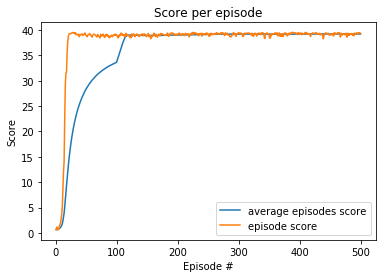

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
# ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores) + 1), avg_scores, label='average episodes score')
plt.plot(np.arange(1, len(episode_scores) + 1), episode_scores, label='episode score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Score per episode")
plt.legend()
plt.show()
fig.savefig("scores.png")

### 2. Watch a smart agent!


In [10]:
# load the weights from file

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                  # get an action (for each agent)
    env_info = env.step(actions)[brain_name] # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 39.440999118424955
